Book Rental Recommendation .

### Description

Book Rent is the largest online and offline book rental chain in India. They provide books of various genres, such as thrillers, mysteries, romances, and science fiction. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base. The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit. 

### Project Objective:

You, as an ML expert, should focus on improving the user experience by personalizing it to the user's needs. You have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. This will ensure that users are renting the books based on their tastes and traits.

Note: You have to perform user-based collaborative filtering and item-based collaborative filtering.

### Dataset description:

 - BX-Users: It contains the information of users.

 - user_id - These have been anonymized and mapped to integers

 - Location - Demographic data is provided

 - Age - Demographic data is provided

 - If available, otherwise, these fields contain NULL-values.

 

### BX-Books: 

 - isbn - Books are identified by their respective ISBNs. Invalid ISBNs have already been removed from the dataset.

 - book_title

 - book_author

 - year_of_publication

 - publisher


 

### BX-Book-Ratings: Contains the book rating information. 

 - user_id

 - isbn

 - rating - Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1–10 (higher values denoting higher appreciation), or implicit, expressed by 0.

 

Note: Download the “BX-Book-Ratings.csv”, “BX-Books.csv”, “BX-Users.csv”, and “Recommend.csv” using the link given in the Book Rental Recommendation project problem statement.

 

### Following operations should be performed:

 - Read the books dataset and explore it

 - Clean up NaN values

 - Read the data where ratings are given by users

 - Take a quick look at the number of unique users and books

 - Convert ISBN variables to numeric numbers in the correct order

 - Convert the user_id variable to numeric numbers in the correct order

 - Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1

 - Re-index the columns to build a matrix

 - Split your data into two sets (training and testing)

 - Make predictions based on user and item variables

 - Use RMSE to evaluate the predictions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_user= pd.read_csv("BX-Users.csv", encoding="latin-1")

 - Encoding is necessary when reading a CSV file to ensure that the text data in the file is correctly interpreted and processed by the Python library.
### Read the books dataset and explore it

In [4]:
df_user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
df_user.tail()

,user_id,Location,Age
278854,278854,"portland, oregon, usa",NaN
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",NaN
278857,278857,"knoxville, tennessee, usa",NaN
278858,278858,"dublin, n/a, ireland",NaN


In [6]:
df_user.shape

(278859, 3)

In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


### Clean up NaN values

In [8]:
df_user.isnull().sum()

user_id          0
Location         1
Age         110763
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

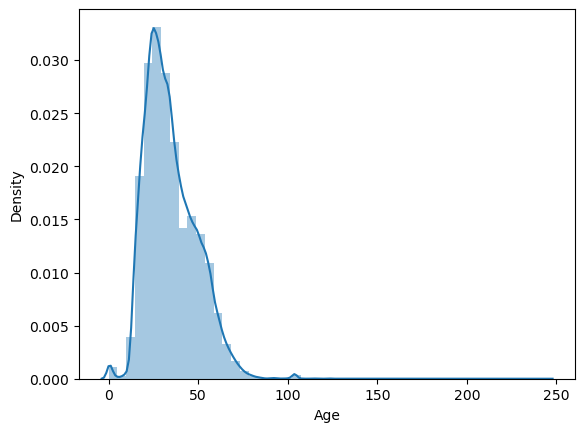

In [9]:
# check how the data is distributed? so we can decide what to use to fill null values
sns.distplot(df_user["Age"])

In [10]:
print(sorted(df_user["Age"].value_counts()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 8, 11, 13, 15, 17, 18, 22, 24, 25, 26, 27, 28, 45, 46, 48, 54, 56, 62, 62, 73, 82, 84, 105, 114, 119, 121, 170, 192, 192, 200, 223, 286, 288, 315, 373, 416, 426, 465, 545, 593, 680, 792, 882, 885, 1035, 1125, 1205, 1319, 1692, 1878, 1885, 1962, 2072, 2077, 2140, 2203, 2303, 2340, 2383, 2461, 2512, 2518, 2526, 2570, 2745, 2758, 2816, 2919, 3044, 3142, 3234, 3404, 3582, 3703, 3896, 3950, 4056, 4194, 4438, 4656, 4665, 4699, 4714, 4778, 4781, 5293, 5347, 5383, 5456, 5547, 5618, 5687]


### Age distribution looks like it has alot of outliers so the next step will be finding the right range.

In [11]:
df_user["Age"].nunique()

165

In [12]:
df_user["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [13]:
mean_age= df_user["Age"].mean()
mean_age

34.75143370454978

In [14]:
median_age=df_user["Age"].median()
median_age

32.0

In [15]:
# Filling Nan value with Median
df_user["Age"].fillna(df_user["Age"].median(), inplace=True)

In [16]:
df_user["Age"].isnull().sum()

0

<Axes: xlabel='Age'>

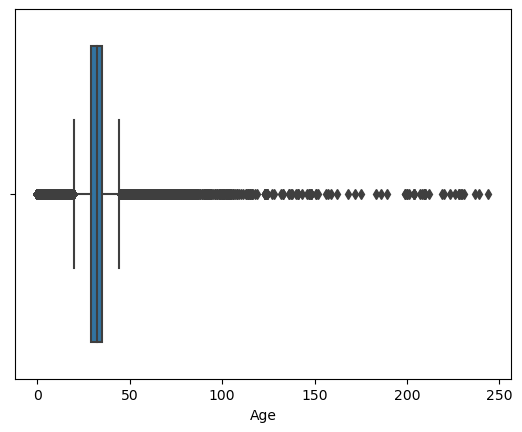

In [17]:
sns.boxplot(x="Age", data=df_user)

In [18]:
df_user["Age"]=df_user["Age"].apply(lambda x: mean_age if(x < 10 or x > 85) else x)

<Axes: xlabel='Age'>

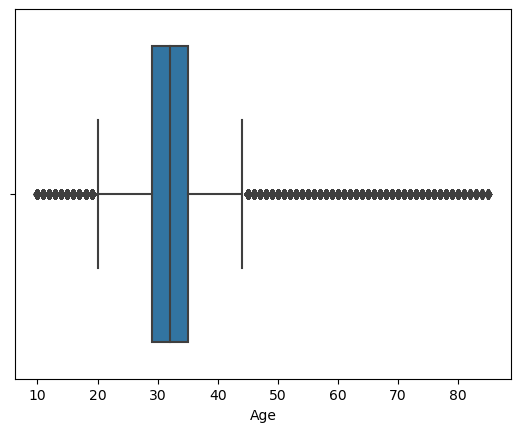

In [19]:
sns.boxplot(x="Age", data=df_user)

In [20]:
df_user.isnull().sum()

user_id     0
Location    1
Age         0
dtype: int64

In [21]:
df_user.dropna(inplace=True)

In [22]:
df_user.isnull().sum()

user_id     0
Location    0
Age         0
dtype: int64

### Read the data where ratings are given by users

In [23]:
# Taking 
df_ratings=pd.read_csv("BX-Book-Ratings.csv", encoding="latin_1")

In [24]:
df_ratings.shape

(1048575, 3)

In [25]:
df_ratings.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [26]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


### Read the book data set.

In [27]:
df_books=pd.read_csv("BX-Books.csv", encoding="latin_1")
print("Books Data:  ", df_books.shape)

Books Data:   (271379, 5)


In [28]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [29]:
df_books.tail()

,isbn,book_title,book_author,year_of_publication,publisher
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press
271378,767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


In [30]:
df_books.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [31]:
df_books.dropna(inplace=True)

In [32]:
df_books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

### All dataset have no null values.
### Data Preprocessing

In [33]:
df_books["year_of_publication"].nunique()

202

In [34]:
df_books["year_of_publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [35]:
pd.set_option("display.max_colwidth",-1)

In [36]:
df_books.loc[df_books['year_of_publication'] == 'John Peterman',:]

,isbn,book_title,book_author,year_of_publication,publisher
6450,735201994,"Peterman Rides Again: Adventures Continue with the Real \J. Peterman\"" Through Life &amp","the Catalog Business""",John Peterman,2000


In [37]:
text_rows = df_books[df_books['year_of_publication'].str.contains(r'[^0-9]+', regex=True, na=False)]


 - We use the .str.contains() method with a regular expression pattern r'[^0-9]+' to check for any sequence of characters that are not digits (non-numeric values).
  - regex=True to indicate that we're using a regular expression pattern.
 - na=False is set to exclude rows with missing values (NaN) from the result.

In [38]:
df_books["publisher"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Oxford University Press                         
1         HarperFlamingo Canada                           
2         HarperPerennial                                 
3         Farrar Straus Giroux                            
4         W. W. Norton &amp; Company                      
                     ...                                  
271374    Random House Childrens Pub (Mm)                 
271375    Dutton Books                                    
271376    HarperSanFrancisco                              
271377    Oxford University Press                         
271378    McGraw-Hill Humanities/Social Sciences/Languages
Name: publisher, Length: 271376, dtype: object>

In [39]:
text_rows.nunique()

isbn                   22
book_title             22
book_author            21
year_of_publication    21
publisher              20
dtype: int64

In [40]:
df_books.shape

(271376, 5)

### Here we have 2 scenarios:
 - One is to rearrange a data like the example below and assign the right value to the right category
 - Since the dataset is very big and the rearrangement needed for the "year_of_publication" is less than 0.1% of the total dataset, I decided to drop it. Otherwise we can perform the following way to rearrange the value.

In [41]:
df_books.at[6450, "publisher"]="the Catalog Business"
df_books.at[6450, "book_title"]="Peterman Rides Again: Adventures Continue with the Real"
df_books.at[6450, "year_of_publication"]="2000"
df_books.at[6450, "book_author"]="John Peterman"

In [42]:
text_rows_new = df_books[df_books['year_of_publication'].str.contains(r'[^0-9]+', regex=True, na=False)]
text_rows_new.head()

,isbn,book_title,book_author,year_of_publication,publisher
43665,330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri
51749,413326608,"Upon my word!: More stories from \My word!\"" a panel game devised by Edward J. Mason &amp","Tony Shryane""",Frank Muir,1974
92036,440500702,"Schrodinger's Cat Trilogy : \The Universe Next Door\"", \""The Trick Top Hat\"", &amp","\""The Homing Pigeons\""""",ROBERT A. WILSON,1988
104317,373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No 698)""",Karen T. Whittenburg,1997
121766,894805959,The Best of the Journal of Irreproducible Results: \Improbable Investigations &amp,"Unfounded Findings\""""",George H. Scherr,1989


In [43]:
df_books=df_books.drop(text_rows_new.index)


In [44]:
df_books.shape

(271355, 5)

In [45]:
df_books["year_of_publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', '1909', '2008', '1378', '1919', '1922',
       '1

### Converting "year_of_publication" dtype to int

In [46]:
df_books["year_of_publication"]=df_books["year_of_publication"].astype(int)

In [47]:
df_books["year_of_publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [48]:
print(sorted(list(df_books["year_of_publication"].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


### The publication date can't be 0 and it can't be future as well , I am doing this in 2023 so I take 2023 as an ending year. I will use mode to replace all 0 and future publication's date.

In [49]:
df_books["year_of_publication"].mode()

0    2002
Name: year_of_publication, dtype: int32

In [50]:
df_books.loc[df_books["year_of_publication"]>2023, "year_of_publication"]=2002

In [51]:
df_books.loc[df_books["year_of_publication"]==0, "year_of_publication"]=2002

In [52]:
print(sorted(list(df_books["year_of_publication"].unique())))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [53]:
df_books.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [54]:
duplicates= df_books.duplicated()

In [55]:
num_of_dublicates = duplicates.sum()
num_of_dublicates

0

### No dublication is a df_books dataset

In [56]:
df_user.isna().sum()

user_id     0
Location    0
Age         0
dtype: int64

In [57]:
duplicates_user= df_user.duplicated()
num_of_dup_user = duplicates_user.sum()
num_of_dup_user

0

In [58]:
df_ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [59]:
duplicates_ratings= df_ratings.duplicated()
num_of_dup_rat = duplicates_ratings.sum()
num_of_dup_rat

146

In [60]:
duplicated_ratings=df_ratings.duplicated(keep=False)
dup_rows=df_ratings[duplicated_ratings]
dup_rows.head()

,user_id,isbn,rating
11337,709,9.78E+12,9
11338,709,9.78E+12,9
21602,4334,6.31E+11,0
21604,4334,6.31E+11,0
28621,6575,6.31E+11,0


In [61]:
df_ratings.shape

(1048575, 3)

### There are 146 duplicates in a ratings dataset. I will drop all duplicates rows from a rating df

In [62]:
df_ratings=df_ratings.drop_duplicates()

In [63]:
df_ratings.shape

(1048429, 3)

In [64]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [65]:
df_ratings.tail()

,user_id,isbn,rating
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0
1048574,250764,515069434,0


In [66]:
df_user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [67]:
df_user.tail()

,user_id,Location,Age
278854,278854,"portland, oregon, usa",32.0
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",32.0
278857,278857,"knoxville, tennessee, usa",32.0
278858,278858,"dublin, n/a, ireland",32.0


In [68]:
df_user.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [69]:
df_user.Location.nunique()

57339

### 28846 unique value is very tidious to perform any tasks so lets seperate the data and assign a column with country. We can seperate into city and country as well

In [70]:
df_books.head(2)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [71]:
df_books.tail(2)

,isbn,book_title,book_author,year_of_publication,publisher
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press
271378,767409752,A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


 - Convert ISBN variables to numeric numbers in the correct order

 - Convert the user_id variable to numeric numbers in the correct order

 - Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1

In [72]:
df_user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [73]:
for i in df_user:
    df_user["Country"]= df_user.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [74]:
df_user.Country.nunique()

529

In [75]:
df_user.Country.unique()[:50]

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', nan, 'vietnam', 'sri lanka', 'pakistan', 'denmark',
       'belgium', 'malaysia', 'turkey', 'philippines', 'greece',
       'colombia', 'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan',
       'españa', 'sweden', 'argentina', 'nigeria', 'london', 'bulgaria',
       'austria', 'romania'], dtype=object)

In [76]:
df_user["Country"] = df_user["Country"].astype("str")

### Further Analysis of changing spelling, upper case and etc can be performed to make a Data more accurate and pleasant

In [77]:
df_user.head()

,user_id,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,united kingdom


### Dropping Location column

In [78]:
df_user.drop("Location", axis=1, inplace=True)

In [79]:
df_user.head()

,user_id,Age,Country
0,1,32.0,usa
1,2,18.0,usa
2,3,32.0,russia
3,4,17.0,portugal
4,5,32.0,united kingdom


In [80]:
from pandas.api.types import is_numeric_dtype

In [81]:
print(is_numeric_dtype(df_user["user_id"]))

False


In [82]:
print(is_numeric_dtype(df_ratings["rating"]))

True


In [83]:
print(is_numeric_dtype(df_books["isbn"]))

False


### Merge all database before performing any task

In [84]:
df_user.head(2)

,user_id,Age,Country
0,1,32.0,usa
1,2,18.0,usa


In [85]:
df_ratings.head(2)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5


In [86]:
df_books.head(2)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [87]:
df=pd.merge(df_user,df_ratings, on="user_id", how="inner")

In [88]:
df=pd.merge(df,df_books, on="isbn", how="inner")

In [89]:
df.shape

(932668, 9)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932668 entries, 0 to 932667
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              932668 non-null  object 
 1   Age                  932668 non-null  float64
 2   Country              932668 non-null  object 
 3   isbn                 932668 non-null  object 
 4   rating               932668 non-null  int64  
 5   book_title           932668 non-null  object 
 6   book_author          932668 non-null  object 
 7   year_of_publication  932668 non-null  int32  
 8   publisher            932668 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 67.6+ MB


### Converting user_ID and ISBN into numeric numbers in the correct order

In [91]:
df.isnull().sum()

user_id                0
Age                    0
Country                0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [96]:
df.head(5)

,user_id,Age,Country,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,49.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,32.0,nan,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,32.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [97]:
#userid_list=df.user_id.unique()

In [98]:
"""def get_userid(user_id):
    itemindex=np.where(userid_list==user_id)
    return itemindex[0][0]"""

'def get_userid(user_id):\n    itemindex=np.where(userid_list==user_id)\n    return itemindex[0][0]'

In [99]:
#df["user_id_num"]=df["user_id"].apply(get_userid)

In [ ]:
# isbnid_list=df.isbn.unique()

In [ ]:
"""def get_isbn_number(isbn):
    itemindex=np.where(isbnid_list==isbn)
    return itemindex[0][0]"""

In [ ]:
#df["isbn_id"]=df["isbn"].apply(get_isbn_number)

In [100]:
#df.head()

,user_id,Age,Country,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,49.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,32.0,nan,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,32.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


### Re-index the columns to build a matrix

In [ ]:
#df.columns

In [ ]:
#new_col_order=['user_id_num','isbn_id','rating','Age', 'book_title','book_author', 'year_of_publication', 'publisher', 'Country', 'user_id','isbn']

In [ ]:
#new_col_order

In [ ]:
#df1=df.reindex(columns=new_col_order)

In [ ]:
#df1.head(2)

In [ ]:
# Keeping df1 incase if we do mistake along the way!
#df=df1.copy()

In [101]:
df.shape

(932668, 9)

### Data Visualization

Text(0.5, 1.0, 'Highest number of Customers by country')

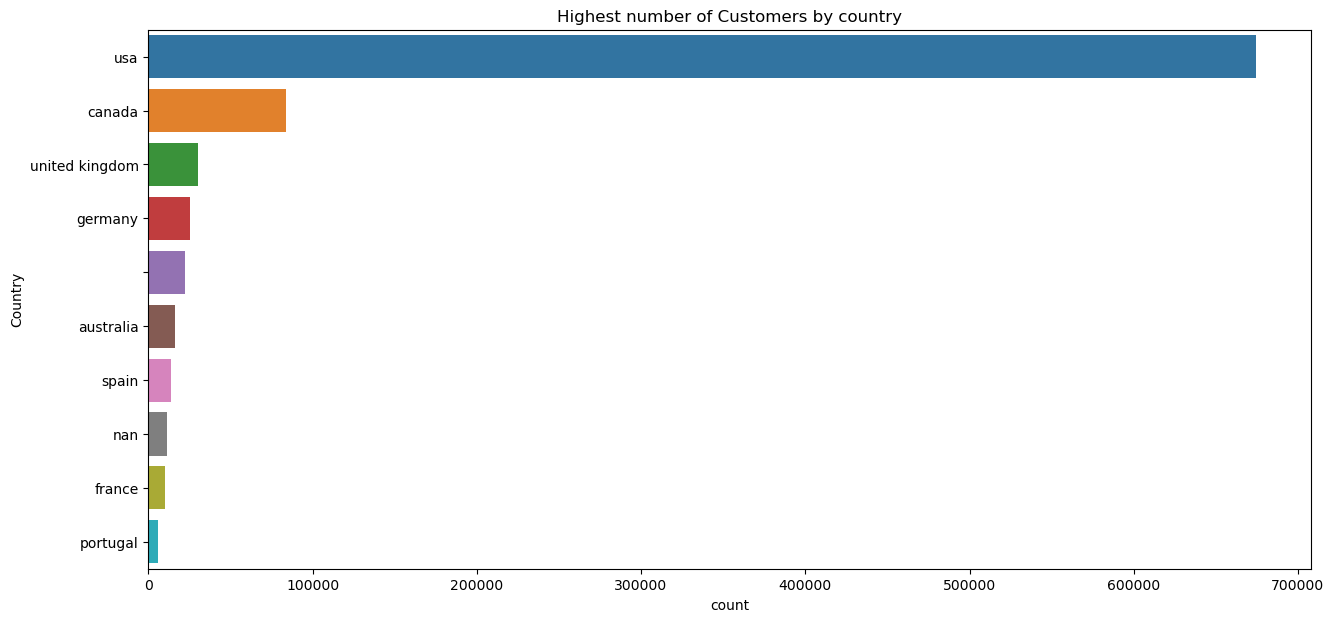

In [102]:
plt.figure(figsize=(15,7))
sns.countplot(y="Country",data=df, order=pd.value_counts(df["Country"]).iloc[:10].index)
plt.title("Highest number of Customers by country")

### The country data needs some filtering but the project is for the ratings so we do not need to put more emphasis to clean dataset for the country.

In [103]:
df["Country"].value_counts().head(7)

usa               674184
canada            83812 
united kingdom    30493 
germany           25376 
                  22435 
australia         16245 
spain             13461 
Name: Country, dtype: int64

Text(0.5, 1.0, 'Number of books by Author')

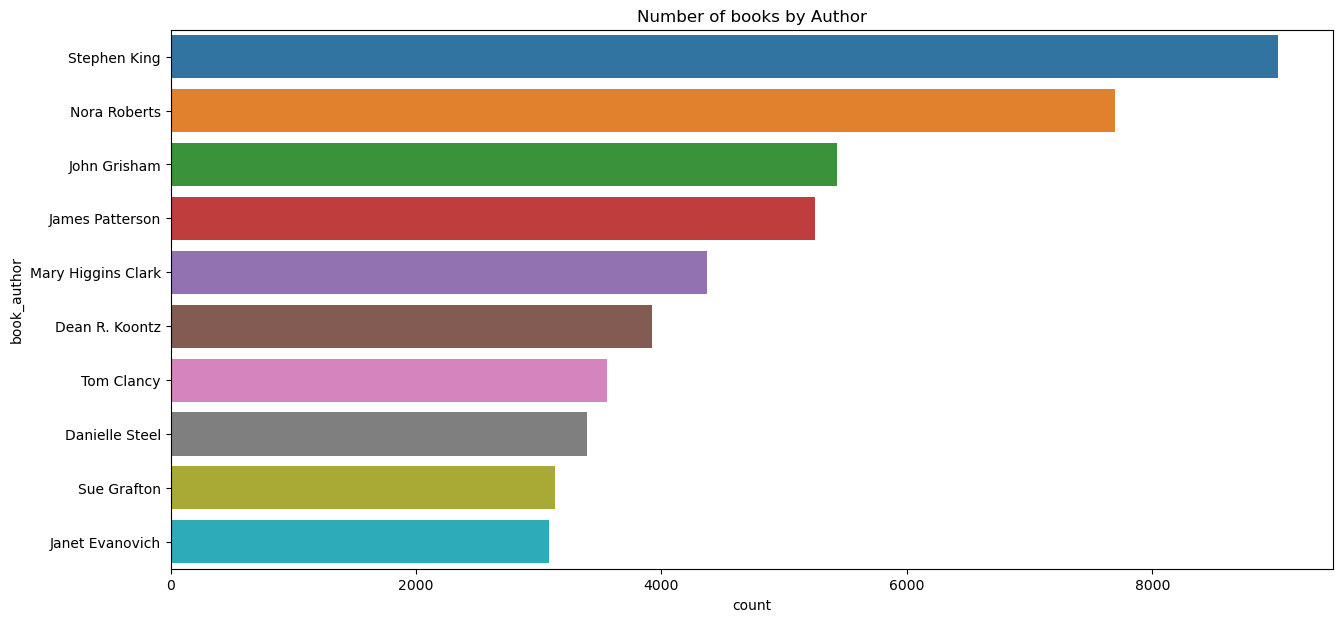

In [106]:
plt.figure(figsize=(15,7))
sns.countplot(y="book_author",data=df, order=pd.value_counts(df["book_author"]).iloc[:10].index)
plt.title("Number of books by Author")

Text(0.5, 1.0, 'Number of ratings for a book')

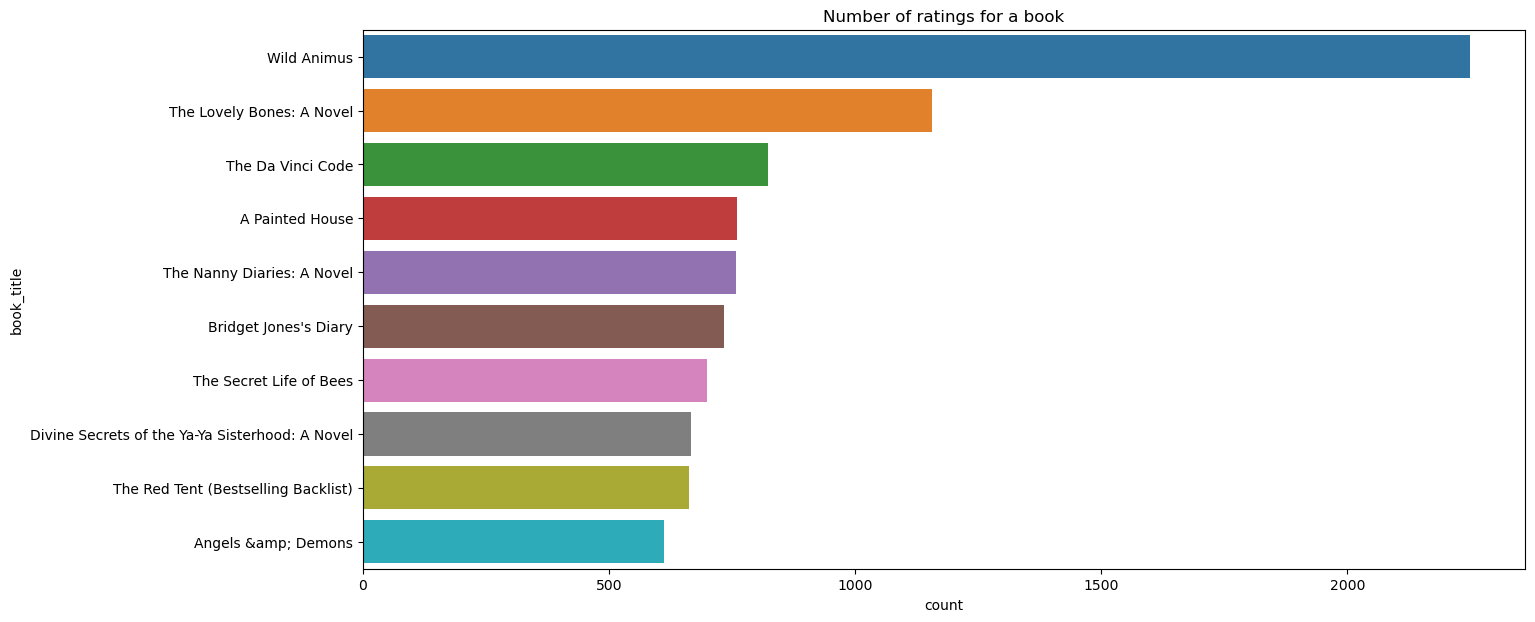

In [107]:
plt.figure(figsize=(15,7))
sns.countplot(y="book_title", data=df, order=df["book_title"].value_counts().index[:10])
plt.title("Number of ratings for a book")

### The book title Wild Animus has the highest number of ratings, Lets find more information here

In [108]:
df.head(2)

,user_id,Age,Country,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [109]:
rating_count =pd.DataFrame(df.groupby("isbn")["rating"].count())

In [110]:
rating_count.sort_values("rating", ascending=False).head(5)

,rating
isbn,
971880107,2249
316666343,1156
385504209,809
312195516,663
60928336,659


In [111]:
# Capitalizing the columns first alphabet.
def cap(s):
    return s[0].capitalize()+s[1:]
df.columns=[cap(col) for col in df.columns] 
df.columns

Index(['User_id', 'Age', 'Country', 'Isbn', 'Rating', 'Book_title',
       'Book_author', 'Year_of_publication', 'Publisher'],
      dtype='object')

Text(0.5, 1.0, 'Number of books by a publisher')

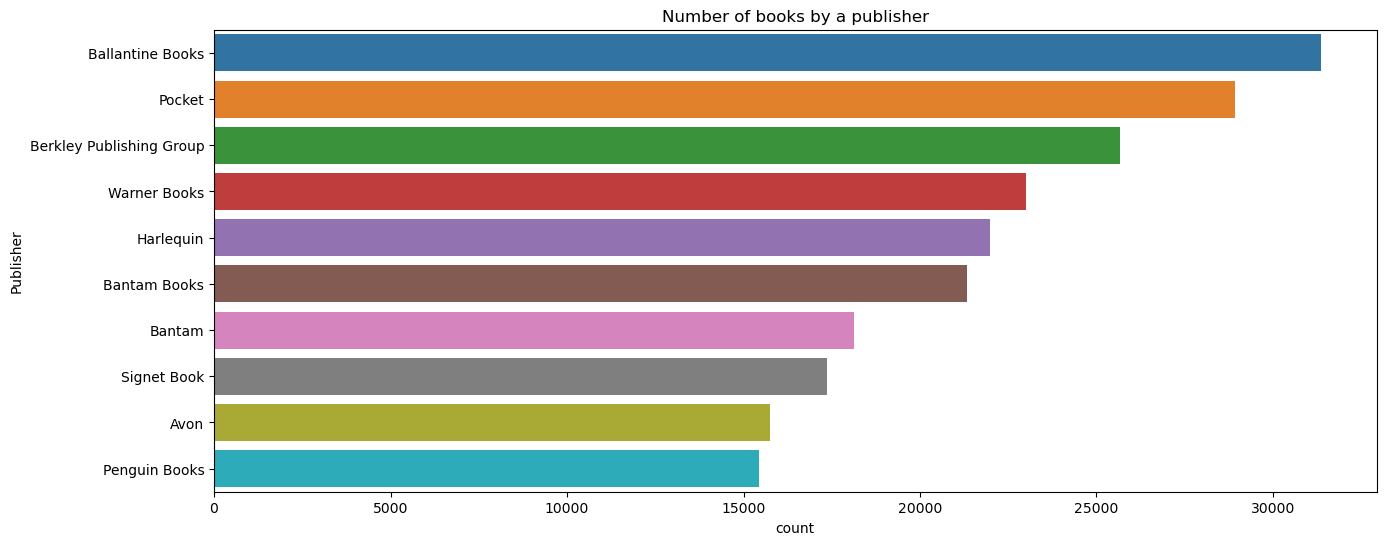

In [112]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=df, order=df["Publisher"].value_counts().index[:10])
plt.title("Number of books by a publisher")

Text(0.5, 1.0, "Top 10 ISBN number= Book's Title")

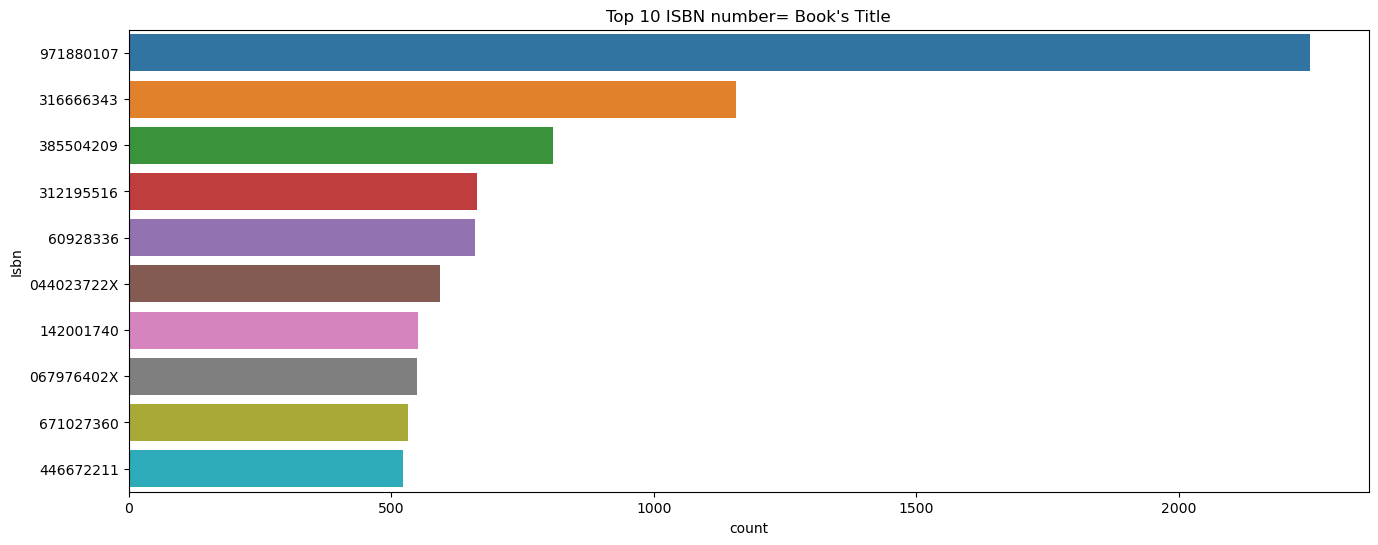

In [113]:
plt.figure(figsize=(16,6))
sns.countplot(y="Isbn", data=df, order=df["Isbn"].value_counts().index[:10])
plt.title("Top 10 ISBN number= Book's Title")

Text(0.5, 1.0, 'Ratings')

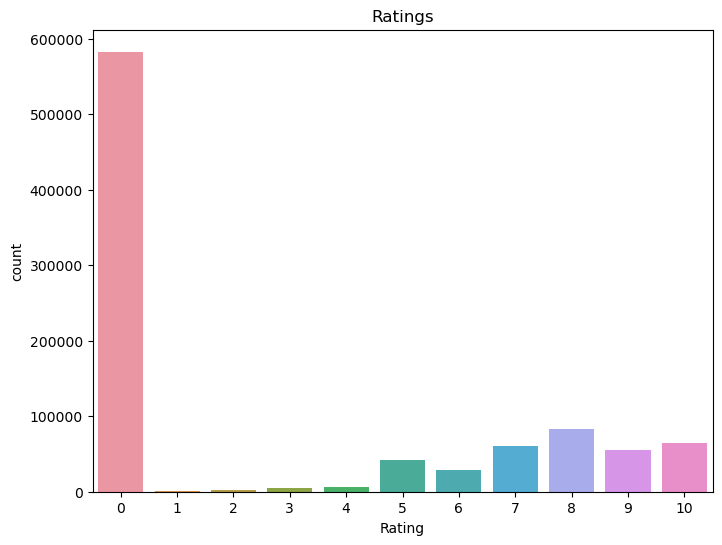

In [114]:
plt.figure(figsize=(8,6))
sns.countplot(x="Rating", data=df)
plt.title("Ratings")

### Rating is the most influential part for sales. This database is very big so we can focus on the business objective

In [115]:
df.shape

(932668, 9)

In [116]:
filtered_ratings= df[(df["Rating"] >=1) & (df["Rating"]<=10)]

In [117]:
filtered_ratings.shape

(349755, 9)

In [ ]:
#rating_with_zero=df[df["Rating"]==0]

In [ ]:
rating_with_zero.shape

In [ ]:
#df_new= df[(df["Rating"] >=1) & (df["Rating"]<=10)]

### ### The data contains both Explicit and Implicit ratings. Since the project is based on the ratings. Both evaluation and prediction is based on ratings, we can elimainate the ratings that has "0" to simplify the project.

<Axes: xlabel='Rating', ylabel='count'>

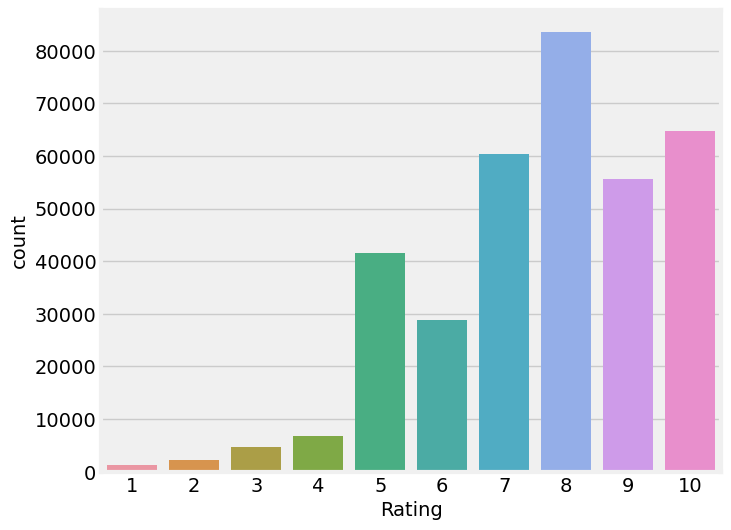

In [118]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
sns.countplot(x="Rating", data=filtered_ratings)

Text(0.5, 1.0, 'Age Distribution')

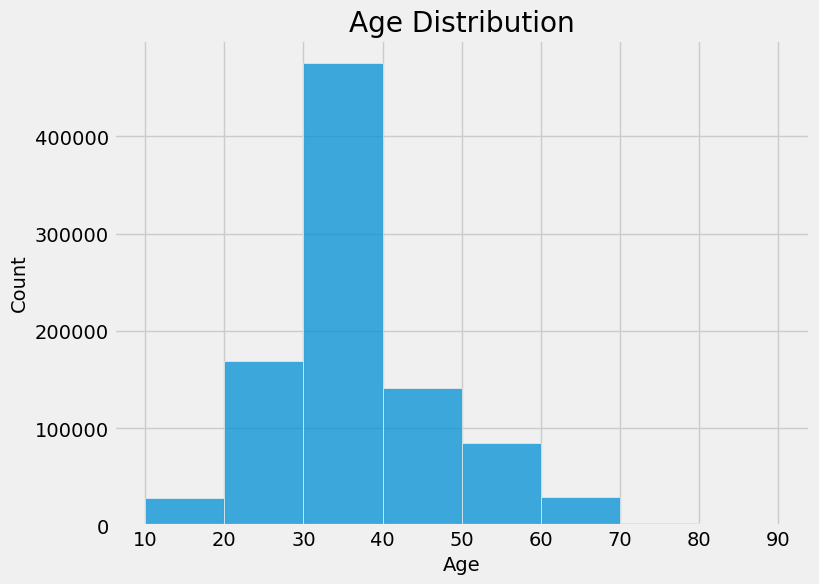

In [122]:
# Age Distribution of Readers
plt.figure(figsize=(8,6))
sns.histplot(x="Age", data=df, bins=range(10,100,10))
plt.title("Age Distribution")


### Majority of the readers are between 30-40. This shows the right target market for the marketing team.

Split your data into two sets (training and testing)

Make predictions based on user and item variables

Use RMSE to evaluate the predictions

In [124]:
df.head()

,User_id,Age,Country,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,49.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,32.0,nan,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,32.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [125]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(df, test_size=0.25)

In [126]:
print(f"Training data: {len(train_data)}")

Training data: 699501


In [127]:
print(f"Test data: {len(test_data)}")

Test data: 233167


In [128]:
train_data.shape

(699501, 9)

In [129]:
test_data.shape

(233167, 9)

In [130]:
num_users=df.User_id.nunique()
print('Number of unique users',num_users)

Number of unique users 82900


In [131]:
num_books =df.Isbn.nunique()
print('Number of unique books',num_books)

Number of unique books 256145


### Make predictions based on user and item variables: To make this prediction we need to create a matrix.

###  The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

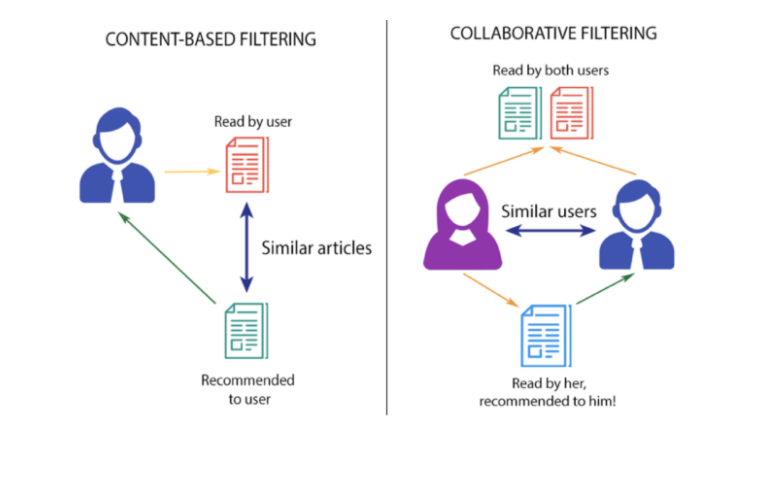

In [203]:
df.head(2)

,User_id,Age,Country,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [267]:
ratings_with_name= df_ratings.merge(df_books, on="Isbn")

In [268]:
ratings_with_name

,User_id,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
941098,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell
941099,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm)
941100,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper Dolls,Tom Tierney,1982,Dover Publications
941101,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Full Color,Tom Tierney,1988,Dover Publications


#### Find out the average ratings of each book and only consider books that has 200+ ratings

In [243]:
num_rating_df=df.groupby("Book_title").count()["Rating"].reset_index()

In [244]:
num_rating_df.rename(columns={"Rating":"Num Of Ratings"}, inplace=True)

In [245]:
num_rating_df

,Book_title,Num Of Ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1
...,...,...
228728,Ã?Â?l- Connection.,1
228729,Ã?Â?lpiraten.,2
228730,Ã?Â?rger mit Produkt X. Roman.,4
228731,Ã?Â?stlich der Berge.,2


In [246]:
average_rating= df.groupby("Book_title").mean()["Rating"].reset_index()
average_rating

,Book_title,Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.00
...,...,...
228728,Ã?Â?l- Connection.,0.00
228729,Ã?Â?lpiraten.,0.00
228730,Ã?Â?rger mit Produkt X. Roman.,5.25
228731,Ã?Â?stlich der Berge.,4.00


In [247]:
average_rating.rename(columns={"Rating": "Avg_rating"}, inplace=True)

In [248]:
average_rating

,Book_title,Avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.00
...,...,...
228728,Ã?Â?l- Connection.,0.00
228729,Ã?Â?lpiraten.,0.00
228730,Ã?Â?rger mit Produkt X. Roman.,5.25
228731,Ã?Â?stlich der Berge.,4.00


In [249]:
popular= num_rating_df.merge(average_rating, on="Book_title")
popular

,Book_title,Num Of Ratings,Avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,0.00
...,...,...,...
228728,Ã?Â?l- Connection.,1,0.00
228729,Ã?Â?lpiraten.,2,0.00
228730,Ã?Â?rger mit Produkt X. Roman.,4,5.25
228731,Ã?Â?stlich der Berge.,2,4.00


In [250]:
# Now lets assume to keep the book that has atleast 50 ratings
popular[popular["Num Of Ratings"]>=50]

,Book_title,Num Of Ratings,Avg_rating
190,10 Lb. Penalty,54,2.370370
663,16 Lighthouse Road,58,2.137931
725,1984,257,4.428016
776,1st to Die: A Novel,466,3.618026
897,2010: Odyssey Two,80,2.837500
...,...,...,...
227582,Young Wives,53,2.547170
228113,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,190,3.252632
228357,Zoya,92,1.565217
228536,"\O\"" Is for Outlaw""",239,2.987448


In [251]:
popular_books_df=popular[popular["Num Of Ratings"]>=50].sort_values("Avg_rating",ascending=False)

In [252]:
popular_books_df.shape

(2160, 3)

### Merging with Books

In [253]:
def cap(s):
    return s[0].capitalize()+s[1:]
df_books.columns=[cap(col) for col in df_books.columns] 
df_books.columns

Index(['Isbn', 'Book_title', 'Book_author', 'Year_of_publication',
       'Publisher'],
      dtype='object')

In [254]:
popular_df=popular_books_df.merge(df_books, on="Book_title").drop_duplicates("Book_title")[["Book_title","Book_author", "Num Of Ratings", "Avg_rating"]]
popular_df

,Book_title,Book_author,Num Of Ratings,Avg_rating
0,Free,Paul Vincent,51,8.039216
3,The Stand (The Complete and Uncut Edition),Stephen King,51,6.078431
4,Griffin &amp; Sabine: An Extraordinary Correspondence,Nick Bantock,62,5.951613
5,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,345,5.933333
7,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,378,5.888889
...,...,...,...,...
6407,Man From St Petersburg,Ken Follett,51,1.039216
6408,Whirlwind,Clavell,52,1.038462
6410,Wild Animus,Rich Shapero,2249,1.034237
6411,Ssn,Tom Clancy,56,1.000000


In [256]:
popular_df

,Book_title,Book_author,Num Of Ratings,Avg_rating
0,Free,Paul Vincent,51,8.039216
3,The Stand (The Complete and Uncut Edition),Stephen King,51,6.078431
4,Griffin &amp; Sabine: An Extraordinary Correspondence,Nick Bantock,62,5.951613
5,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,345,5.933333
7,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,378,5.888889
...,...,...,...,...
6407,Man From St Petersburg,Ken Follett,51,1.039216
6408,Whirlwind,Clavell,52,1.038462
6410,Wild Animus,Rich Shapero,2249,1.034237
6411,Ssn,Tom Clancy,56,1.000000


### Collaborative Feature Modelling

In [269]:
ratings_with_name

,User_id,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
941098,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell
941099,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm)
941100,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper Dolls,Tom Tierney,1982,Dover Publications
941101,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Full Color,Tom Tierney,1988,Dover Publications


In [281]:
ratings_with_name.groupby("User_id").count()["Rating"]

User_id
2         1 
8         17
9         3 
10        1 
12        1 
         .. 
278846    1 
278849    4 
278851    23
278852    1 
278854    8 
Name: Rating, Length: 83644, dtype: int64

### Out of all users the above code shows that 83644 users have given atleast one ratings for a book


In [286]:
# Taking users that has given atleast 40 ratings:
x=ratings_with_name.groupby("User_id").count()["Rating"]>=40
users_that_gives_more_ratings = x[x].index

In [287]:
users_that_gives_more_ratings.shape

(3419,)

In [288]:
ratings_with_name["User_id"].isin(users_that_gives_more_ratings)

0         False
1         False
2         True 
3         False
4         True 
          ...  
941098    True 
941099    True 
941100    True 
941101    True 
941102    True 
Name: User_id, Length: 941103, dtype: bool

In [298]:
# Users that has given total of 50+ ratings. 660026 rows been created by 3419 users only.
filtered_ratings= ratings_with_name[ratings_with_name ["User_id"].isin(users_that_gives_more_ratings)]

In [299]:
filtered_ratings

,User_id,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
10,56157,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
941098,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell
941099,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm)
941100,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper Dolls,Tom Tierney,1982,Dover Publications
941101,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Full Color,Tom Tierney,1988,Dover Publications


In [300]:
df_ratings.shape

(1048429, 3)

In [301]:
df_user.shape

(278858, 3)

### Out of 1048429 ratings, 660026  ratings is produced by 3419 users. So basically 0.3 % of the total users did almost 62% of the ratings

In [317]:
y = filtered_ratings.groupby("Book_title").count()["Rating"]>=20
famous_books=y[y].index
famous_books

Index([''Salem's Lot', '09-Nov', '10 Lb. Penalty', '101 Dalmatians',
       '14,000 Things to Be Happy About', '16 Lighthouse Road', '1984',
       '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       ...
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zia', 'Zlata's Diary: A Child's Life in Sarajevo',
       'Zodiac: The Eco-Thriller', 'Zombies of the Gene Pool', 'Zoya',
       '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"',
       'e', 'stardust'],
      dtype='object', name='Book_title', length=4591)

In [318]:
final_ratings=filtered_ratings[filtered_ratings["Book_title"].isin(famous_books)]
final_ratings

,User_id,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
10,56157,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
940847,250405,694521507,0,Worst Fears Realized,Stuart Woods,1999,HarperAudio
940896,250405,1558002650,0,Memories of Midnight,Sidney Sheldon,1990,Audio Literature
940909,250405,1570426910,0,The Drowning People,Richard Mason,1999,Time Warner Audio Major
940956,250510,553502662,7,Disobedience,Jane Hamilton,2000,Random House Audio Publishing Group


In [319]:
final_ratings.drop_duplicates()

,User_id,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
10,56157,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
940847,250405,694521507,0,Worst Fears Realized,Stuart Woods,1999,HarperAudio
940896,250405,1558002650,0,Memories of Midnight,Sidney Sheldon,1990,Audio Literature
940909,250405,1570426910,0,The Drowning People,Richard Mason,1999,Time Warner Audio Major
940956,250510,553502662,7,Disobedience,Jane Hamilton,2000,Random House Audio Publishing Group


In [321]:
pt=final_ratings.pivot_table(index="Book_title", columns="User_id", values="Rating")

In [322]:
pt.fillna(0, inplace=True)
pt

User_id,243,254,507,638,643,651,741,805,882,929,...,277965,278026,278137,278144,278188,278356,278418,278582,278633,278843
Book_title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09-Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
from sklearn.metrics.pairwise import cosine_similarity

In [324]:
similarity_score=cosine_similarity(pt)

In [325]:
similarity_score.shape

(4591, 4591)

In [333]:
# Enumerate function shows the index and the similarity, We have entered 0 in similarity_score so it shows all the distance 
sorted(list(enumerate(similarity_score[1])), key=lambda x:x[1], reverse=True)[1:10]

[(1194, 0.3584885719585767),
 (4212, 0.3584885719585767),
 (1740, 0.3133753935840093),
 (2182, 0.3133753935840093),
 (2441, 0.3071480204107596),
 (4447, 0.2991577020911751),
 (3028, 0.2975660764253299),
 (1693, 0.29701393213651417),
 (2132, 0.293685281289753)]

In [376]:
def recommend(book_names):
    index=np.where(pt.index==book_names)[0][0]
    Recommendation= sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:10]
    for i in Recommendation:
        print(pt.index[i[0]])

In [377]:
recommend("The Matarese Circle")

Scarlatti Inheritance
Birds of Prey
To Cut a Long Story Short
Legacy
Texas
Superstitious
'Salem's Lot
Shadows
The Magic Circle


### Prediction based on books that are similar

In [374]:
def recommend(user_id):
    index1=np.where(pt.columns==user_id)[0][0]
    Recommendation= sorted(list(enumerate(similarity_score[index1])), key=lambda x:x[1], reverse=True)[1:10]
    for i in Recommendation:
        print(pt.index[i[0]])

In [375]:
recommend(243)

The Matarese Circle
The Shining
Scarlatti Inheritance
Stephen King's Danse Macabre
Startide Rising (The Uplift Saga, Book 2)
Birds of Prey
Maniac Magee
Rose Madder
Skeleton Crew


### Prediction based on user_id and there preferance that are similar

### Use RMSE to evaluate the predictions

In [474]:
df.head()

,User_id,Age,Country,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher
0,2,18.0,usa,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,32.0,canada,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,49.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,32.0,nan,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,32.0,canada,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [554]:
df.shape

(932668, 9)

In [556]:
df.isnull().sum()

User_id                0
Age                    0
Country                0
Isbn                   0
Rating                 0
Book_title             0
Book_author            0
Year_of_publication    0
Publisher              0
dtype: int64

In [475]:
filtered_df = df[(df['Rating'] >= 1) & (df['Rating'] <= 10)]

In [476]:
sampled_df = filtered_df.sample(n=10000, random_state=42) 

In [477]:
df_new = sampled_df.copy()

In [478]:
df_new.shape

(10000, 9)

In [479]:
n_users = df_new.User_id.nunique()
n_books = df_new.Isbn.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Books: '+str(n_books))

Num. of Users: 6084
Num of Books: 8522


In [480]:
isbn_list = df_new.Isbn.unique()
print(" Length of isbn List:", len(isbn_list))
def get_isbn_numeric_id(Isbn):
    #print ("  isbn is:" , isbn)
    itemindex = np.where(isbn_list==Isbn)
    return itemindex[0][0]

 Length of isbn List: 8522


In [481]:
user_id_list = df_new.User_id.unique()
print(" Length of user_id List:", len(user_id_list))
def get_user_id_numeric_id(User_id):
    itemindex = np.where(user_id_list==User_id)
    return itemindex[0][0]

 Length of user_id List: 6084


In [482]:
df_new['User_id_order'] = df_new['User_id'].apply(get_user_id_numeric_id)

In [483]:
df_new['Isbn_id'] = df_new['Isbn'].apply(get_isbn_numeric_id)

In [484]:
df_new.head(2)

,User_id,Age,Country,Isbn,Rating,Book_title,Book_author,Year_of_publication,Publisher,User_id_order,Isbn_id
839945,140358,32.0,usa,960714006,5,Master Key to Good Golf,Leslie King,1979,Golf Associates,0,0
320420,188685,21.0,usa,316289124,8,Mr. Midshipman Hornblower (Hornblower Saga),C.S. Forester,1984,Back Bay Books,1,1


In [485]:
new_col_order = ['User_id_order', 'Isbn_id', 'Rating', 'Book_title', 'Book_author','Year_of_publication','Publisher','Isbn','User_id']
df_new = df_new.reindex(columns= new_col_order)
df_new.head()

,User_id_order,Isbn_id,Rating,Book_title,Book_author,Year_of_publication,Publisher,Isbn,User_id
839945,0,0,5,Master Key to Good Golf,Leslie King,1979,Golf Associates,960714006,140358
320420,1,1,8,Mr. Midshipman Hornblower (Hornblower Saga),C.S. Forester,1984,Back Bay Books,316289124,188685
604292,2,2,6,A Hole in the Earth,Robert Bausch,2001,Harvest Books,156011840,34566
888480,3,3,5,The Novels of Anne Bronte,Arnold Craig Bell,1996,Merlin Books Ltd,086303635X,189835
769212,4,4,6,Guardias! Guardias?,Terry Pratchett,1999,Downtown Book Center,8401479460,93018


In [486]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(df_new, test_size=0.20)

In [487]:
train_data

,User_id_order,Isbn_id,Rating,Book_title,Book_author,Year_of_publication,Publisher,Isbn,User_id
811645,3591,7066,8,Lilith: A Snake in the Grass,Jack L. Chalker,1981,Del Rey Books,034529369X,244349
792890,1821,2161,9,"Forget Perfect: Finding Joy, Meaning, and Satisfaction in the Life You'Ve Already Got and the You You Already Are",Lisa Earle,2001,Perigee Books,039952715X,250405
49956,1031,78,4,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books,345313860,223325
638392,1703,2001,7,The Enigma of Arrival: A Novel,V.S. Naipaul,1988,Vintage Books USA,394757602,39225
572498,2397,2383,9,Spider's Web,Charles Osborne,2000,St. Martin's Minotaur,312266502,232052
...,...,...,...,...,...,...,...,...,...
522304,4512,5948,8,Theory/Practice Hell,Eugene Kogan,1981,Berkley Publishing Group,425051811,21895
362721,3802,4903,4,In Search of Excellence,"Jr., Robert H Waterman",1988,Warner Books,446385077,11532
105850,3704,6,7,1st to Die: A Novel,James Patterson,2002,Warner Vision,446610038,157655
302049,1498,1747,10,Christmas Cookie Murder: A Lucy Stone Mystery (Lucy Stone Mysteries (Paperback)),Leslie Meier,2000,Kensington Publishing Corporation,157566691X,193778


In [540]:
train_data_matrix = np.zeros((n_users, n_books))
for col in train_data.itertuples():
    train_data_matrix[col[1]-1, col[2]-1] = col[3]  
    
# Create user-book matrix for testing
test_data_matrix = np.zeros((n_users, n_books))
for col in test_data.itertuples():
    test_data_matrix[col[1]-1, col[2]-1] = col[3]

In [541]:
# calculate the similarity
from sklearn.metrics import pairwise_distances
user_simi=pairwise_distances(train_data_matrix,metric='cosine')
item_simi=pairwise_distances(train_data_matrix.T,metric='cosine')


In [542]:
user_simi

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [568]:
item_simi

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [589]:
def predict(Ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = Ratings.mean(axis=1)
        rating_diff = (Ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(rating_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        return pred  # Add a return statement for the 'user' case
    elif type == 'item':
        pred = Ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        return pred  # Add a return statement for the 'item' case
    else:
        raise ValueError("Invalid 'type'. Use 'user' or 'item'.")


In [590]:
item_prediction = predict(train_data_matrix, item_simi, type='item')


In [591]:
user_prediction = predict(train_data_matrix, user_simi, type='user')

In [592]:
print(item_prediction)

[[0.         0.00093893 0.00094284 ... 0.00093897 0.00093941 0.00093908]
 [0.00152564 0.00028056 0.00153212 ... 0.00152582 0.00152654 0.001526  ]
 [0.0221805  0.02218221 0.         ... 0.0221831  0.02219352 0.0221857 ]
 ...
 [0.00105621 0.0010563  0.0010607  ... 0.00105634 0.00105683 0.00105646]
 [0.00117357 0.00117366 0.00117855 ... 0.00117371 0.00117426 0.00117385]
 [0.00176036 0.00176049 0.00176783 ... 0.00176056 0.00176139 0.        ]]


In [593]:
print(user_prediction)

[[-0.00023745  0.00074891  0.00058452 ...  0.00124209  0.0010777
   0.00058452]
 [ 0.00166603  0.00035088  0.00117285 ...  0.00183043  0.00166603
   0.00117285]
 [ 0.02232033  0.02199155  0.02100519 ...  0.02248473  0.02232033
   0.02182715]
 ...
 [ 0.00119506  0.00086627  0.00070188 ...  0.00135945  0.00119506
   0.00070188]
 [ 0.00131242  0.00098364  0.00081924 ...  0.00147681  0.00131242
   0.00081924]
 [ 0.00189923  0.00157045  0.00140606 ...  0.00206363  0.00189923
   0.00058409]]


In [574]:
def rmse(actual, prediction):
    if prediction is None:
        # Handle the None value, e.g., assign a default prediction
        prediction = np.zeros_like(actual)  # Assuming a default prediction of zeros
    
    prediction = prediction.flatten()
    actual = actual.flatten()
    return np.sqrt(mean_squared_error(actual, prediction))


In [575]:
print('user based rmse',rmse(train_data_matrix,item_prediction))


user based rmse 0.09742910097671208


In [576]:
print('item based rmse',rmse(train_data_matrix,user_prediction))

item based rmse 0.09738761396709829
